# Data Loading

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


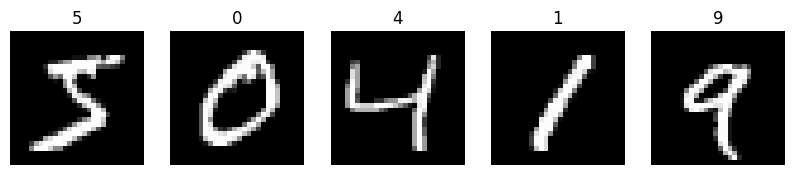

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

fig, axes = plt.subplots(1, 5, figsize=(10, 2))
for i, ax in enumerate(axes):
    ax.imshow(x_train[i], cmap='gray')
    ax.set_title(y_train[i])
    ax.axis('off')
plt.show()

# Data Preprocessing

In [2]:
import numpy as np

x_train = x_train.astype('float32') / 255.0
x_test  = x_test.astype('float32')  / 255.0

x_train = np.expand_dims(x_train, -1)
x_test  = np.expand_dims(x_test,  -1)

y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test  = tf.keras.utils.to_categorical(y_test,  10)

# Building CNN Model

In [3]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(28, 28, 1)),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │       160,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 179,926 (702.84 KB)

 Trainable params: 179,926 (702.84 KB)

 Non-trainable params: 0 (0.00 B)

# Training Model

In [4]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    x_train, y_train,
    validation_split=0.1,
    epochs=5,
    batch_size=64
)

Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 52s 38ms/step - accuracy: 0.8864 - loss: 0.3970 - val_accuracy: 0.9835 - val_loss: 0.0590
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 32s 38ms/step - accuracy: 0.9822 - loss: 0.0577 - val_accuracy: 0.9867 - val_loss: 0.0425
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 32s 37ms/step - accuracy: 0.9892 - loss: 0.0340 - val_accuracy: 0.9883 - val_loss: 0.0422
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 32s 38ms/step - accuracy: 0.9915 - loss: 0.0256 - val_accuracy: 0.9887 - val_loss: 0.0408
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 33s 39ms/step - accuracy: 0.9934 - loss: 0.0203 - val_accuracy: 0.9897 - val_loss: 0.0364


# Evaluating Performance

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9891 - loss: 0.0344
Test accuracy: 99.10%


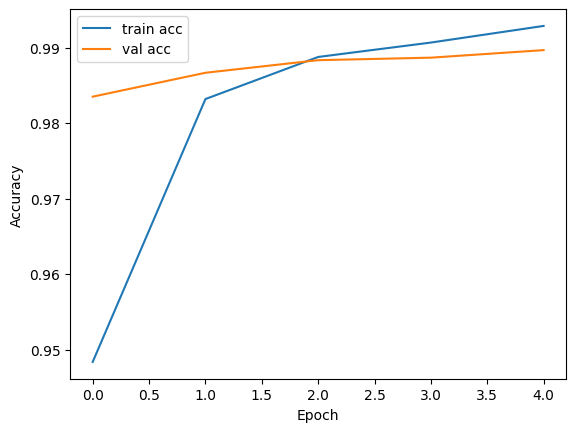

In [5]:
test_loss, test_acc = model.evaluate(x_test, y_test)
test_acc = test_acc * 100
print(f"Test accuracy: {test_acc:.2f}%")

plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Saving Model

In [6]:
model.save('mnist_cnn.keras')